In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import os
sys.path.append(os.path.abspath('C:/Users/vpming/tuni_ml/src'))
from extract_data import build_cellwise_df_10samplesperfile
from extract_cell_timetrace import extract_cell_timetrace

In [3]:
data_path = 'C:/Users/vpming/tuni_ml/data'
df = build_cellwise_df_10samplesperfile(data_path)

x = np.stack(df['time_trace'])
y = df['dis_to_target'].values

n_bins = 4
bins = np.linspace(y.min(), y.max(), n_bins + 1)
y_class = np.digitize(y, bins[1:-1])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(x, y_class, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Random Forest Test Accuracy: 0.547


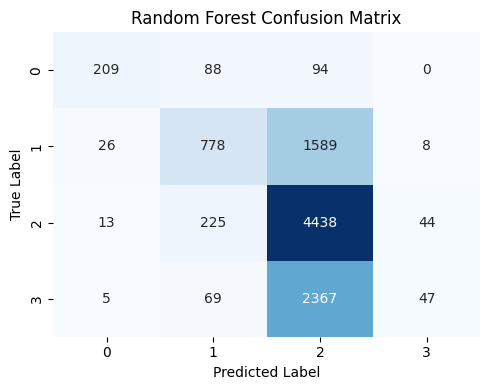

In [4]:
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Random Forest Test Accuracy: {acc:.3f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest Confusion Matrix")
plt.tight_layout()
plt.show()

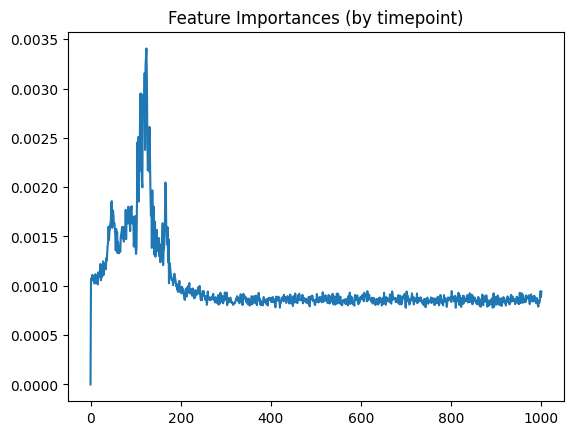

In [ ]:
importances = rf.feature_importances_
plt.plot(importances)
plt.title('Feature Importances (by timepoint)')
plt.show()